# The Project Objective is to develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered.

### First Milestone

Conduct exploratory data analysis on data for the TLC project. You’ll also use Tableau to create visuals for an executive summary to help non-technical stakeholders engage and interact with the data.

Methods
1. EDA and cleaning

2. Select and build visualization(s) type {Create plots to visualize relationships between relevant variables}

3. Share your results with the Automatidata team

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

#To see all the row within this range
pd.set_option('display.max.rows', 50)

In [2]:
taxi_data = pd.read_csv(r'C:\Users\HP\Downloads\Data analytics\Taxi\2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
taxi_data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [4]:
taxi_data.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [5]:
# Adjusting column data types
taxi_data = taxi_data.astype({
    'VendorID': 'int64',
    'passenger_count': 'int64',
    'trip_distance': 'float',
    'RatecodeID': 'int64',
    'PULocationID': 'int64',
    'DOLocationID': 'int64',
    'payment_type': 'int64',
    'fare_amount': 'float',
    'extra': 'float',
    'mta_tax': 'float',
    'tip_amount': 'float',
    'tolls_amount': 'float',
    'improvement_surcharge': 'float',
    'total_amount': 'float'
})

taxi_data['tpep_pickup_datetime'] = pd.to_datetime(
    taxi_data['tpep_pickup_datetime'], 
    format='%m/%d/%Y %I:%M:%S %p'
)

taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(
    taxi_data['tpep_dropoff_datetime'], 
    format='%m/%d/%Y %I:%M:%S %p'
)

# Dropping unnecessary columns
taxi_data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Calculate the pick up hour and duration of each trip in minutes
taxi_data['ride_duration_minutes'] = ((
    taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60).astype(int)

taxi_data['pickup_hour'] = taxi_data['tpep_pickup_datetime'].dt.hour % 12
taxi_data['pickup_hour'] = taxi_data['pickup_hour'].replace(0, 12)  # Replace 0 with 12
taxi_data['pickup_period'] = taxi_data['tpep_pickup_datetime'].dt.strftime('%p')
taxi_data['pickup_day_of_week'] = taxi_data['tpep_pickup_datetime'].dt.day_name().str.slice(stop=3)

taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration_minutes,pickup_hour,pickup_period,pickup_day_of_week
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,0.0,0.5,2.76,0.00,0.3,16.56,14,8,AM,Sat
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,0.0,0.5,4.00,0.00,0.3,20.80,26,2,PM,Tue
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,0.0,0.5,1.45,0.00,0.3,8.75,7,7,AM,Fri
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,0.0,0.5,6.39,0.00,0.3,27.69,30,1,PM,Sun
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.5,0.5,0.00,0.00,0.3,17.80,16,11,PM,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,...,1.0,0.5,0.00,0.00,0.3,5.80,3,5,PM,Fri
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,...,0.0,0.5,14.64,5.76,0.3,73.20,40,4,PM,Sun
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,...,0.0,0.5,0.00,0.00,0.3,5.30,4,2,PM,Mon
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,...,0.0,0.5,1.70,0.00,0.3,13.00,11,12,PM,Sat


In [6]:
#A function for catergorising each ride by time of day (morning, afternoon, evening, night and midnight) 

def categorize_time_of_day(hour, period):
    if period == 'AM':
        if 5 <= hour < 12:
            return 'Morning'
        else:  # 12 AM - 4:59 AM
            return 'Midnight'
    elif period == 'PM':
        if 1 <= hour < 5 or hour == 12:
            return 'Afternoon'
        elif 5 <= hour < 9:
            return 'Evening'
        elif 9<= hour < 12:  # 9 PM - 11:59 PM
            return 'Night'
    else:
        return 'Not_captured'

# Apply the function to create the 'time_of_day' column
taxi_data['time_of_day'] = taxi_data.apply(
    lambda row: categorize_time_of_day(row['pickup_hour'], row['pickup_period']),
    axis=1
)

In [7]:
#Rearrange the order of the columns
new_order = ['VendorID', 'time_of_day', 'passenger_count', 'trip_distance','ride_duration_minutes',
             'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID','payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge',
             'total_amount','pickup_hour','pickup_day_of_week','pickup_period','tpep_pickup_datetime',
             'tpep_dropoff_datetime']
taxi_data = taxi_data[new_order]

# Convert the column to a categorical type with the custom order
custom_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
taxi_data['pickup_day_of_week'] = pd.Categorical(taxi_data['pickup_day_of_week'], categories=custom_order, ordered=True)

taxi_data

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,tpep_pickup_datetime,tpep_dropoff_datetime
0,2,Morning,6,3.34,14,1,N,100,231,1,...,0.5,2.76,0.00,0.3,16.56,8,Sat,AM,2017-03-25 08:55:43,2017-03-25 09:09:47
1,1,Afternoon,1,1.80,26,1,N,186,43,1,...,0.5,4.00,0.00,0.3,20.80,2,Tue,PM,2017-04-11 14:53:28,2017-04-11 15:19:58
2,1,Morning,1,1.00,7,1,N,262,236,1,...,0.5,1.45,0.00,0.3,8.75,7,Fri,AM,2017-12-15 07:26:56,2017-12-15 07:34:08
3,2,Afternoon,1,3.70,30,1,N,188,97,1,...,0.5,6.39,0.00,0.3,27.69,1,Sun,PM,2017-05-07 13:17:59,2017-05-07 13:48:14
4,2,Night,1,4.37,16,1,N,4,112,2,...,0.5,0.00,0.00,0.3,17.80,11,Sat,PM,2017-04-15 23:32:20,2017-04-15 23:49:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,Evening,3,0.61,3,1,N,48,186,2,...,0.5,0.00,0.00,0.3,5.80,5,Fri,PM,2017-02-24 17:37:23,2017-02-24 17:40:39
22695,2,Afternoon,1,16.71,40,2,N,132,164,1,...,0.5,14.64,5.76,0.3,73.20,4,Sun,PM,2017-08-06 16:43:59,2017-08-06 17:24:47
22696,2,Afternoon,1,0.42,4,1,N,107,234,2,...,0.5,0.00,0.00,0.3,5.30,2,Mon,PM,2017-09-04 14:54:14,2017-09-04 14:58:22
22697,2,Afternoon,1,2.36,11,1,N,68,144,1,...,0.5,1.70,0.00,0.3,13.00,12,Sat,PM,2017-07-15 12:56:30,2017-07-15 13:08:26


In [8]:
taxi_data[['ride_duration_minutes', 'trip_distance']].describe()
#Noted and comfirmed the min ride_duration_minutes is -16 (which is the only one of its kind) is not realistic
#and probably a mistake

,ride_duration_minutes,trip_distance
count,22699.000000,22699.000000
mean,16.526984,2.913313
std,61.994881,3.653171
min,-16.000000,0.000000
25%,6.000000,0.990000
50%,11.000000,1.610000
75%,18.000000,3.060000
max,1439.000000,33.960000


In [9]:
#A function to round up number to x significant places
import math

def round_to_sig_figs(x, sig_figs):
    if x == 0:
        return 0  # Zero remains zero
    return round(x, -int(math.floor(math.log10(abs(x)))) + (sig_figs - 1))

In [10]:
#Samll calculation for rides taken in the norning, afternoon and evening
hourly_rides_am = round_to_sig_figs(taxi_data[taxi_data['time_of_day'] == 'Morning'].shape[0] / 8760,2)
hourly_rides_pm = round_to_sig_figs(taxi_data[taxi_data['time_of_day'] == 'Afternoon'].shape[0] / 8760,2)
hourly_rides_pm2 = round_to_sig_figs(taxi_data[taxi_data['time_of_day'] == 'Evening'].shape[0] / 8760,2)
hourly_revenue = taxi_data.groupby('pickup_hour')['total_amount'].sum()

Morning:    6 - 11am 
Afternoon: 12 -  4pm 
Evening:    5 -  8pm 
Night:      9 - 11pm 
Midnight:  12 -  5am


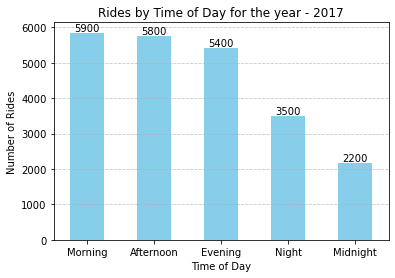

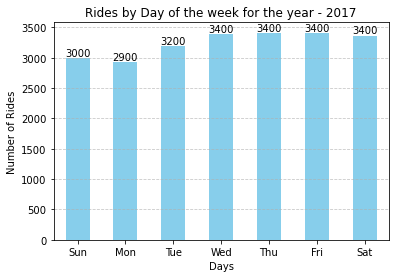

Average passenger per hour every Morning: 0.67
Average passenger per hour every Afternoon: 0.66
Average passenger per hour every Evening: 0.62


In [11]:
# Plot the bar chart for Number of rides by time of day

# Print the time ranges for context
print('Morning:    6 - 11am \nAfternoon: 12 -  4pm \nEvening:    5 -  8pm \nNight:      9 - 11pm \nMidnight:  12 -  5am')

ax = taxi_data['time_of_day'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Rides by Time of Day for the year - 2017')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


    
#Plot bar chart for the Number of rides per Day of the week
ax = taxi_data.sort_values('pickup_day_of_week')
ax = ax['pickup_day_of_week'].value_counts(sort = False).plot(kind='bar', color='skyblue')

plt.title('Rides by Day of the week for the year - 2017')
plt.xlabel('Days')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()
print(f'Average passenger per hour every Morning: {hourly_rides_am}')
print(f'Average passenger per hour every Afternoon: {hourly_rides_pm}')
print(f'Average passenger per hour every Evening: {hourly_rides_pm2}')


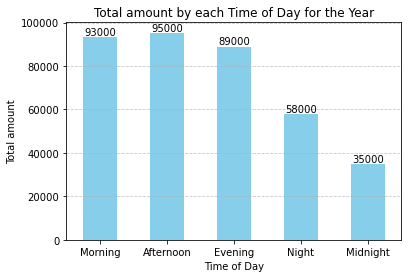

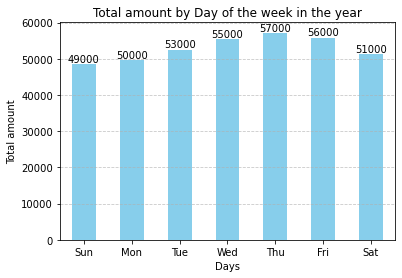

Average amount by the Time of Day 
Morning: $ 255.93 
Afternoon: $ 261.12 
Evening: $ 243.68 
Night: $ 158.46 
Midnight: $ 95.16


In [12]:
#Plot bar chart of Total amount made in each time of day
total_amt = taxi_data.groupby(['time_of_day'])['total_amount'].sum().apply(lambda x: int(x))
total_amt = total_amt.loc[['Morning','Afternoon','Evening','Night','Midnight']]
ax = total_amt.plot(kind='bar', color='skyblue')

plt.title('Total amount by each Time of Day for the Year')
plt.xlabel('Time of Day')
plt.ylabel('Total amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')    
    
plt.show()


#Plot bar chart for the Total money earn per Day of the week
ax = taxi_data.sort_values('pickup_day_of_week')
ax = ax.groupby('pickup_day_of_week')['total_amount'].sum().apply(lambda x: int(x)).plot(kind='bar', color='skyblue')

plt.title('Total amount by Day of the week in the year')
plt.xlabel('Days')
plt.ylabel('Total amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

average_cash = (taxi_data.groupby('time_of_day').sum()/365)['total_amount'].apply(lambda x: round(x,2))
average_cash = average_cash.loc[['Morning','Afternoon','Evening','Night','Midnight']]

print(f'Average amount by the Time of Day \nMorning: $ {average_cash[0]} \nAfternoon: $ {average_cash[1]} \nEvening: $ {average_cash[2]} \nNight: $ {average_cash[3]} \nMidnight: $ {average_cash[4]}')


Based on the charts above it is safe to say 75% of the passengers acquire our services between 6am - 8pm and in these periods:

Morning pickups bringing in a Total sum of 93000 Dollars, for the calendar year and an average of $255.93 daily

Afternoon pickups bringing in a Total sum of 95000 Dollars, for the calendar year and an average of $261.12 daily

Evening pickups bringing in a Total sum of 89000, Dollars for the calendar year and an average of $243.68 daily

Night pickups bringing in a Total sum of 58000 Dollars, for the calendar year and an average of $158.46 daily

Midnight pickups bringing in a Total sum of 35000 Dollars, for the calendar year and an average of $95.16 daily


In [13]:
#Dummy dataset for more charts below to visualise more insights
dummy_1 = taxi_data.copy()
dummy_1['month_order'] = dummy_1['tpep_pickup_datetime'].dt.month
dummy_1['month'] = dummy_1['tpep_pickup_datetime'].dt.month_name().str.slice(stop =3)
dummy_1['pickup_date'] = pd.to_datetime(taxi_data['tpep_pickup_datetime']).dt.day
dummy_1 =  dummy_1[['month_order','pickup_date','month','passenger_count','trip_distance',
                    'ride_duration_minutes','fare_amount','tip_amount', 'extra','total_amount',
                    'RatecodeID','DOLocationID']]

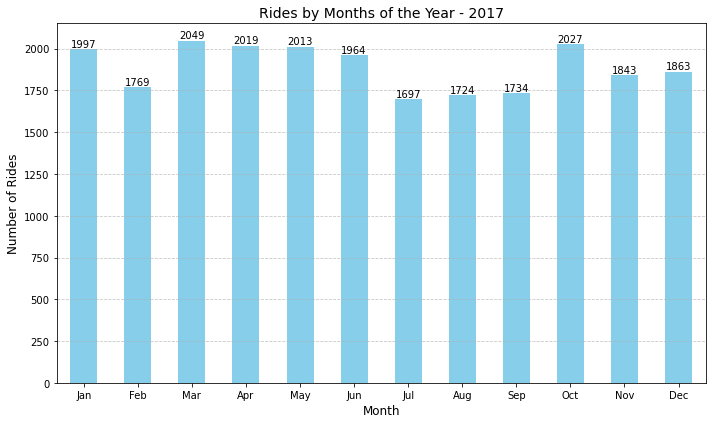

Average rides per day: 62.19
Average passenger per month: 1891.58


In [14]:
# Bar chart of Rides for each month of the Year
monthly_rides = dummy_1.groupby(['month', 'month_order']).size().reset_index(name='count')
monthly_rides = monthly_rides.sort_values('month_order')

# Plot
plt.figure(figsize=(10, 6))  
ax = monthly_rides.set_index('month')['count'].plot(kind='bar', color='skyblue')


plt.title('Rides by Months of the Year - 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

b = sum(monthly_rides['count'])
print(f'Average rides per day: {round(b /365, 2)}')

print(f'Average passenger per month: {round(b/12, 2)}')

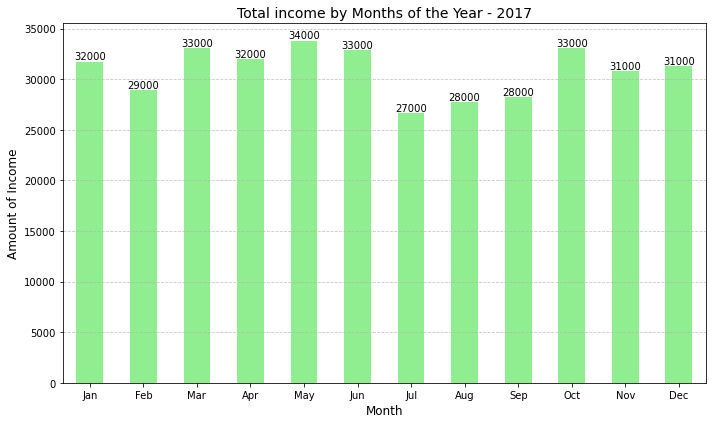

Average income per day: $ 1014.33


In [15]:
# Bar chart of Income for each month of the Year
monthly_income = dummy_1.groupby(['month', 'month_order'])['total_amount'].sum().reset_index(name='sum')
monthly_income = monthly_income.sort_values('month_order')

# Plot
plt.figure(figsize=(10, 6))  
bx = monthly_income.set_index('month')['sum'].plot(kind='bar', color='lightgreen')


plt.title('Total income by Months of the Year - 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount of Income', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in bx.patches:
    bx.annotate(f'{round_to_sig_figs(p.get_height(),2).astype(int)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

c = sum(monthly_income['sum'])
print(f'Average income per day: $ {round(c /365, 2)}')

<Figure size 1296x720 with 0 Axes>

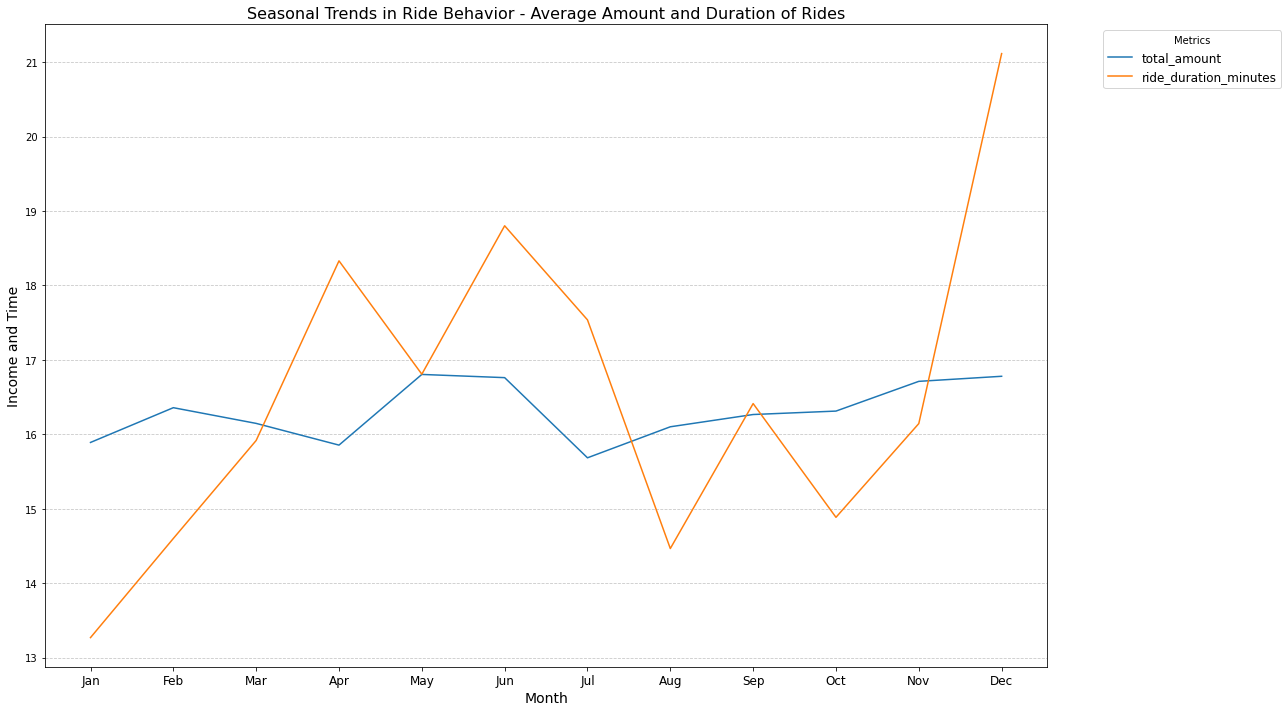

Average Trip Distance for Months when Total Amount Peaks:
month
Apr    18.99
Aug    14.10
Dec     0.00
Feb     2.60
Jan     7.30
Jul    16.89
Jun     0.00
Mar    26.12
May    33.92
Nov    25.50
Oct     0.32
Sep    31.95
Name: trip_distance, dtype: float64


In [16]:
# Grouping by month and calculating averages for analysis
seasonal_data = (
    dummy_1.groupby(['month', 'month_order'])[['total_amount', 'ride_duration_minutes', 'trip_distance']]
    .mean()
    .sort_values('month_order')
)

# Plotting seasonal trends
plt.figure(figsize=(18, 10))  # Make plot larger for better readability
ax = seasonal_data[['total_amount', 'ride_duration_minutes']].plot(kind='line', figsize=(18, 10))

# Adjusting aesthetics
plt.title('Seasonal Trends in Ride Behavior - Average Amount and Duration of Rides', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Income and Time', fontsize=14)
plt.xticks(ticks=range(len(seasonal_data)), labels=seasonal_data.index.get_level_values('month'), rotation=0, fontsize=12)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # Legend outside plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Finding the average distance when total_amount peaks for each month
peak_total_amount = dummy_1.groupby(['month'])['total_amount'].idxmax()
peak_data = dummy_1.loc[peak_total_amount]
average_distances = peak_data.groupby(['month'])['trip_distance'].mean()

print("Average Trip Distance for Months when Total Amount Peaks:")
print(average_distances)

The month of March, October, April and May are the months with the most rides representively, each holding a total amount of rides of atleast 2000 rides.
From the line graph above, there are a few interesting things to speak of;

1. From March to April, the total amount of income generated seems to decline, with a significant increase of duration of rides(by minutes) during that period.


2. Come in May, the duration of rides steadly decrease while the amount of income generated climbs up; maintaining somewhat of a stable income through June, before steadly dropping as July approaches.


3. The months (March and October) seem to be the two seperate period of the year when the amount of rides increases significantly without the concern of the previous month performance. 


4. Starting June, the duration of rides makes a boorish trend to November; when it spikes up without any pull back till December. Making November and December the months with the highest duration of rides despite 8th and 7th position in term of total number of ride per month.

In [17]:
#I will dive into each month(March, October, April and May) to find out the top 3 Drop-off location
#and the Rate Code in Effect at the end of the trip, of all the Total income and tip amount above the average

In [18]:
# Identifying RatecodeID and DOlocationID with above-average Total Amount and Tip Amount in the dataset
avg_total_amount = dummy_1['total_amount'].mean()
avg_tip_amount = dummy_1['tip_amount'].mean()

ratecode_doloc_above_avg = dummy_1[
    (dummy_1['total_amount'] > avg_total_amount) & (dummy_1['tip_amount'] > avg_tip_amount)]

In [19]:
ratecode_doloc_above_avg

,month_order,pickup_date,month,passenger_count,trip_distance,ride_duration_minutes,fare_amount,tip_amount,extra,total_amount,RatecodeID,DOLocationID
0,3,25,Mar,6,3.34,14,13.0,2.76,0.0,16.56,1,231
1,4,11,Apr,1,1.80,26,16.0,4.00,0.0,20.80,1,43
3,5,7,May,1,3.70,30,20.5,6.39,0.0,27.69,1,97
6,5,3,May,1,12.83,59,47.5,9.86,1.0,59.16,1,241
9,11,10,Nov,1,1.60,20,13.0,2.75,0.0,16.55,1,237
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,5,26,May,1,5.10,21,19.5,3.00,0.0,23.30,1,112
22676,12,14,Dec,1,9.47,35,32.0,6.00,0.0,44.56,1,263
22686,2,8,Feb,5,10.64,80,52.0,14.84,1.0,74.18,1,70
22692,7,16,Jul,1,5.70,18,19.0,4.05,0.5,24.35,1,17


In [38]:
def get_top_dolocations_by_ratecode(data, month=None):
    """
    Get the top 3 DOLocationID for each RatecodeID based on size.
    
    Parameters:
        data (DataFrame): The dataset containing ride information.
        month (str): Optional. Filter the dataset for a specific month (e.g., 'Jan', 'Feb').
        
    Returns:
        DataFrame: A DataFrame with the top 3 DOLocationID for each RatecodeID.
    """
    if month:
        filtered_data = data[data['month'] == month]
    else:
        filtered_data = data
    
    # Group by RatecodeID and DOLocationID and get the size
    grouped = (
        filtered_data.groupby(['RatecodeID', 'DOLocationID']).size()
        .reset_index(name='count')
    )
    
    grouped = grouped.sort_values(['RatecodeID', 'count'], ascending=[True, False])
    
    # Get the top 3 DOLocationID for each RatecodeID
    top_dolocations = (
        grouped.groupby('RatecodeID').head(3).reset_index(drop=True)
    )
    
    return top_dolocations


#Form a small table with the first three location on the last column
mar_result = get_top_dolocations_by_ratecode(dummy_1, month='Mar').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

oct_result = get_top_dolocations_by_ratecode(dummy_1, month='Oct').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

apr_result = get_top_dolocations_by_ratecode(dummy_1, month='Apr').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

may_result = get_top_dolocations_by_ratecode(dummy_1, month='May').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

In [50]:
#Show the frequency of all RateCodeID for rides at the time of dropoff

mar_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='Mar').groupby('RatecodeID').sum().reset_index('RatecodeID')
oct_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='Oct').groupby('RatecodeID').sum().reset_index('RatecodeID')
apr_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='Apr').groupby('RatecodeID').sum().reset_index('RatecodeID')
may_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='May').groupby('RatecodeID').sum().reset_index('RatecodeID')

In [51]:
mar_result_freq

,RatecodeID,DOLocationID,count
0,1,643,206
1,2,626,24
2,3,1,5
3,4,265,3
4,5,375,4


In [44]:
a  = mar_result.iloc[0,1]
b = oct_result.iloc[0,1]
c = apr_result.iloc[0,1]
d = may_result.iloc[0,1]

print(f"For the month of March, the three most reoccuring Dropoff location are ID:[{a}].\n" + 
      f"For the month of October;  ID[{b}].\n" +
      f"For the month of April;    ID[{c}].\n" +
      f"For the month of October;  ID[{d}].\n" +
      "With the Effect of the Standard Rate during dropoff for all for the locations")

For the month of March, the three most reoccuring Dropoff location are ID:[236, 170, 237].
For the month of October;  ID[236, 161, 237].
For the month of April;    ID[236, 161, 237].
For the month of October;  ID[237, 142, 161].
With the Effect of the Standard Rate during dropoff for all for the locations


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Second Milestone

#### Population question :- Customers who use a Credit card pay higher fare amounts than those who use Cash? 

Simulate a Hypothesis test:

The relationship between fare amount and payment type. 

Test the hypothesis that customers who use a credit card pay higher fare amounts.

Should you conclude that there is a statistically significant relationship between credit card payment and fare amount, discuss what the next steps should be: what are your thoughts on strategies our team could implement to encourage customers to pay with credit card?

##### The Null hypothesis is: There's no difference in average fare for customers that pay with cash or credit card.

##### The Alternative hypothesis: There's a significant difference in the average fare for customers that pay with cash or credit card.

##### Significant level (S.I):  5% (which is standard by tradition)
    
##### Since it's the aims to compare two samples mean and their population's standard deviation is unknown; I will use a T-test. Even if their sample size is more than 30


In [56]:
taxi_data[['payment_type','fare_amount']].describe()

,payment_type,fare_amount
count,22699.000000,22699.000000
mean,1.336887,13.026629
std,0.496211,13.243791
min,1.000000,-120.000000
25%,1.000000,6.500000
50%,1.000000,9.500000
75%,2.000000,14.500000
max,4.000000,999.990000


In [60]:
# Credit card is assigned 2 and Cash is assigned 1, under payment_type

credit_card = taxi_data[taxi_data['payment_type'] == 1]['fare_amount']
cash = taxi_data[taxi_data['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

Ttest_indResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12)

###### At face value, the p-value is significantly less than the S.I (the p-value in negative)...  So I will 'Reject the Hull hypothesis' and 'Fail to Reject the Alt. Hypothesis'